In [39]:
#import pandas.rpy.common as prc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bokeh.plotting as bplt

from sklearn.metrics import accuracy_score,classification_report
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.externals.six import StringIO
from sklearn.datasets import load_iris

%matplotlib inline
bplt.output_notebook() 

In [40]:
# %load './bound_visualize.py'
def bound_visualize(clf, data, title) :
## 決定境界の可視化
    fig=plt.figure()
    # Parameters for plot
    n_classes = 2
    plot_colors = "br"
    plot_step = 0.005    #グラフ描画のメッシュ

    #グラフ描画時の説明変数 x、yの最大値＆最小値。
    x_min = 1.5
    x_max = 5.0
    y_min = 0
    y_max = 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    #各メッシュ上での分類を計算
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #分類を等高線フィールドプロットでプロット
    cs = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(data[u'Sepal.Width'][data[u'Species']=='setosa']
            ,data[u'Petal.Width'][data[u'Species']=='setosa']
            ,c='b',marker='o',label='setosa')
    plt.scatter(data[u'Sepal.Width'][data[u'Species']=='virginica']
            ,data[u'Petal.Width'][data[u'Species']=='virginica']
            ,c='r',marker='x',label='virginica')
    plt.scatter(data[u'Sepal.Width'][data[u'Species']=='versicolor']
            ,data[u'Petal.Width'][data[u'Species']=='versicolor']
            ,c='g',marker='^',label='versicolor')
    plt.title(title)
    plt.xlabel('Sepal.Width')
    plt.ylabel('Petal.Width')
    plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0)

    plt.show()


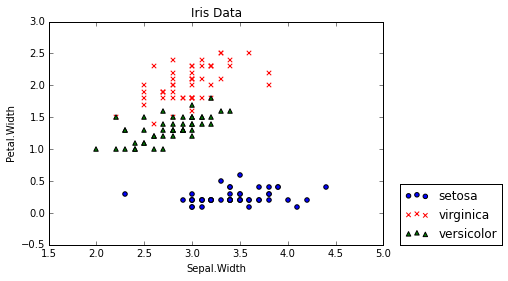

In [41]:
##　データ読み込み
#d1=prc.load_data("iris")
d1=pd.read_csv('/home/himuta/git/hajipata11/Hajipata/iris.txt')

## データ全部で散布図作成
def make_scatter1(data,title):
    fig=plt.figure()
    ax=plt.subplot(111)
    plt.scatter(data[u'Sepal.Width'][data[u'Species']=='setosa']
            ,data[u'Petal.Width'][data[u'Species']=='setosa']
         ,c='b',marker='o',label='setosa')
    plt.scatter(data[u'Sepal.Width'][data[u'Species']=='virginica']
            ,data[u'Petal.Width'][data[u'Species']=='virginica']
            ,c='r',marker='x',label='virginica')
    plt.scatter(data[u'Sepal.Width'][data[u'Species']=='versicolor']
            ,data[u'Petal.Width'][data[u'Species']=='versicolor']
            ,c='g',marker='^',label='versicolor')
    plt.title(title)
    plt.xlabel('Sepal.Width')
    plt.ylabel('Petal.Width')
    plt.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0)
    ax.axis([1.5, 5.0, -0.5, 3])
    plt.show()

graph1=make_scatter1(d1,'Iris Data')

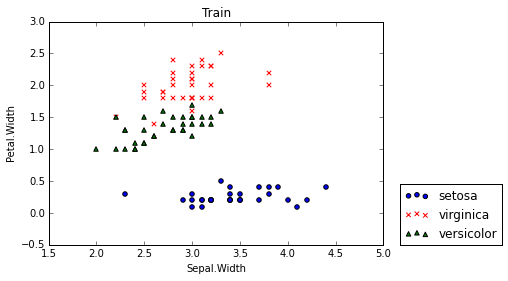

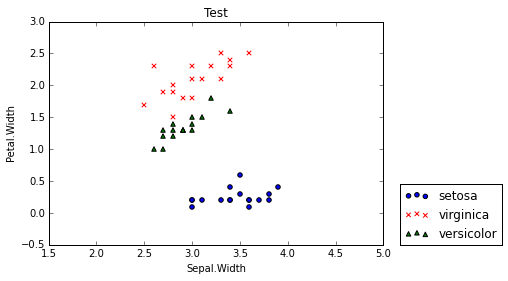

In [42]:
## trainデータとTestデータに分割
d1_train= d1[np.asarray(d1.index) % 3 !=  1]
d1_test = d1[np.asarray(d1.index) % 3 == 1]


## TrainとTestの散布図
graph2=make_scatter1(d1_train,'Train')
graph3=make_scatter1(d1_test,'Test')

In [43]:
##　データに判別フラグ0/1を付加 versicolor=1
addFLG1=pd.DataFrame([['setosa',0],['virginica',0],['versicolor',1]]) ## 2行3列のデータを作成
addFLG1.columns=['Species','FLG1'] 
d1_train=pd.merge(d1_train,addFLG1)  ## inner join
d1_test=pd.merge(d1_test,addFLG1)

## データ準備
TrainFeature=pd.concat([d1_train[u'Sepal.Width'],d1_train[u'Petal.Width']],axis=1)
TrainLabel=d1_train[u'FLG1']

TestFeature=pd.concat([d1_test[u'Sepal.Width'],d1_test[u'Petal.Width']],axis=1)
TestLabel=d1_test[u'FLG1']

Tree1 Train:0.99
Tree1 Test:0.94


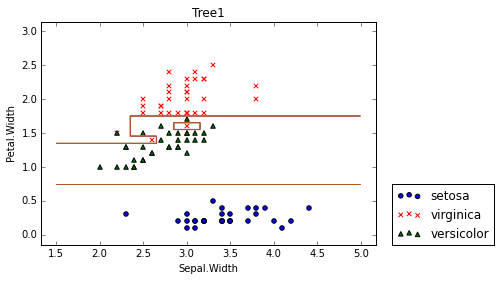

In [44]:
##　決定木　デフォルト設定
from sklearn.tree import DecisionTreeClassifier
tr1=DecisionTreeClassifier()

tr1.fit(TrainFeature,TrainLabel)
result_tr1=tr1.predict(TestFeature) ##　Testデータでの正解率
result_tr1_re=tr1.predict(TrainFeature) ##　Trainデータでの正解率

##　精度検証とプロット
print'Tree1 Train:'+ str(accuracy_score(result_tr1_re,TrainLabel))
print'Tree1 Test:'+ str(accuracy_score(result_tr1,TestLabel))
bound_visualize(tr1,d1_train,'Tree1')

Tree2 Train:0.97
Tree2 Test:0.94


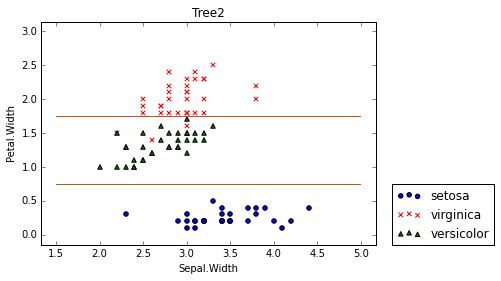

In [45]:
##　決定木　パラメータをGridSearch
parameters = {
    'min_samples_split' : [2, 3, 4,  6, 8, 10],  #分割対象となる最小のサンプル数
    'min_samples_leaf' : [1, 2, 3, 4, 6, 8, 10],  #葉の最小のサンプル数
    'criterion'         : ['gini','entropy'], #ジニ係数か、エントロピーか
    'max_depth'         : [2, 4, 6, 8, 10] #木の深さ
} 
tr2 = GridSearchCV(DecisionTreeClassifier(), parameters,cv=25)

tr2.fit(TrainFeature,TrainLabel)
result_tr2=tr2.predict(TestFeature)     ##　Testデータでの正解率
result_tr2_re=tr2.predict(TrainFeature) ##　Trainデータでの正解率

##　精度検証とプロット
print'Tree2 Train:'+ str(accuracy_score(result_tr2_re,TrainLabel))
print'Tree2 Test:'+ str(accuracy_score(result_tr2,TestLabel))
bound_visualize(tr2,d1_train,'Tree2')

In [46]:
print tr2.best_params_
print ' '
print tr2.best_estimator_

{'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
 
DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')


In [47]:
tr2.grid_scores_

[mean: 0.97000, std: 0.10022, params: {'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 mean: 0.97000, std: 0.10022, params: {'min_samples_split': 3, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 mean: 0.97000, std: 0.10022, params: {'min_samples_split': 4, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 mean: 0.97000, std: 0.10022, params: {'min_samples_split': 6, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 mean: 0.97000, std: 0.10022, params: {'min_samples_split': 8, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 mean: 0.97000, std: 0.10022, params: {'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1},
 mean: 0.97000, std: 0.10022, params: {'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2},
 mean: 0.97000, std: 0.10022, params: {'min_samples_split': 3, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2},
 mean: 

RF1 Train:0.99
RF1 Test:0.94


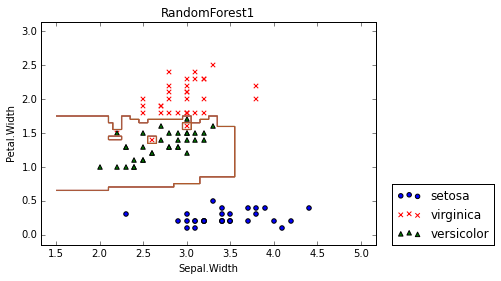

In [48]:
##　ランダムフォレスト　 デフォルト設定
##  デフォルト設定だと実効の度に結果が変わる
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()

rf1.fit(TrainFeature,TrainLabel)
result_rf1=rf1.predict(TestFeature)
result_rf1_re=rf1.predict(TrainFeature)


##　精度検証とプロット
print'RF1 Train:'+ str(accuracy_score(result_rf1_re,TrainLabel))
print'RF1 Test:'+ str(accuracy_score(result_rf1,TestLabel))
bound_visualize(rf1,d1_train,'RandomForest1')

In [49]:
##　結果が変わる理由は、生成する木の数が少ない（デフォルトでは10個）だから
print rf1.get_params
print rf1.base_estimator

<bound method RandomForestClassifier.get_params of RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)>
DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')


In [50]:
rf1.estimators_

[DecisionTreeClassifier(compute_importances=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_density=None, min_samples_leaf=1, min_samples_split=2,
             random_state=55405743, splitter='best'),
 DecisionTreeClassifier(compute_importances=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_density=None, min_samples_leaf=1, min_samples_split=2,
             random_state=940135714, splitter='best'),
 DecisionTreeClassifier(compute_importances=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_density=None, min_samples_leaf=1, min_samples_split=2,
             random_state=1809156714, splitter='best'),
 DecisionTreeClassifier(compute_importances=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_density=None, min_samples_leaf=1, min_samples_

RF2 Train:0.97
RF2 Test:0.94


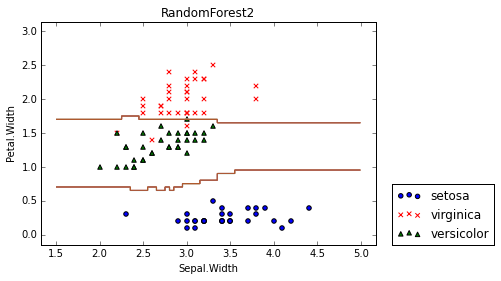

In [51]:
## ランダムフォレスト　木の数だけ最適化する(他のパラメータは上の決定木と同じ)
parameters = {
    'n_estimators' : range(1, 150, 3),        #生成する木の数
    'max_features' : ['auto'],                #木ごとに採用するする変数の数
#    'oob_score'      :  [True],
    'n_jobs'            :   [-1],             #並列処理数　-1は自動設定
    }

rf2 = GridSearchCV(RandomForestClassifier(
                                           criterion='gini' #tr2.best_params_['criterion']
                                           ,max_depth=10  #tr2.best_params_['max_depth']
                                           ,min_samples_leaf=2#tr2.best_params_['min_samples_leaf']
                                           ,min_samples_split=4#tr2.best_params_['min_samples_split']
                                         )
                   , parameters, cv=10, scoring='accuracy', n_jobs=-1 )
rf2.fit(TrainFeature,TrainLabel)
result_rf2=rf2.predict(TestFeature)
result_rf2_re=rf2.predict(TrainFeature) 

##　精度検証とプロット
print'RF2 Train:'+ str(accuracy_score(result_rf2_re,TrainLabel))
print'RF2 Test:'+ str(accuracy_score(result_rf2,TestLabel))
bound_visualize(rf2,d1_train,'RandomForest2')

In [52]:
print rf2.best_params_
print rf2.best_estimator_

{'max_features': 'auto', 'n_estimators': 31, 'n_jobs': -1}
RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=2,
            min_samples_split=4, n_estimators=31, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0)


In [53]:
rf2.grid_scores_


[mean: 0.88000, std: 0.12203, params: {'max_features': 'auto', 'n_estimators': 1, 'n_jobs': -1},
 mean: 0.91000, std: 0.07689, params: {'max_features': 'auto', 'n_estimators': 4, 'n_jobs': -1},
 mean: 0.90000, std: 0.08671, params: {'max_features': 'auto', 'n_estimators': 7, 'n_jobs': -1},
 mean: 0.92000, std: 0.05754, params: {'max_features': 'auto', 'n_estimators': 10, 'n_jobs': -1},
 mean: 0.95000, std: 0.05199, params: {'max_features': 'auto', 'n_estimators': 13, 'n_jobs': -1},
 mean: 0.94000, std: 0.05072, params: {'max_features': 'auto', 'n_estimators': 16, 'n_jobs': -1},
 mean: 0.94000, std: 0.05072, params: {'max_features': 'auto', 'n_estimators': 19, 'n_jobs': -1},
 mean: 0.93000, std: 0.06205, params: {'max_features': 'auto', 'n_estimators': 22, 'n_jobs': -1},
 mean: 0.94000, std: 0.05072, params: {'max_features': 'auto', 'n_estimators': 25, 'n_jobs': -1},
 mean: 0.94000, std: 0.06452, params: {'max_features': 'auto', 'n_estimators': 28, 'n_jobs': -1},
 mean: 0.96000, std: 0.

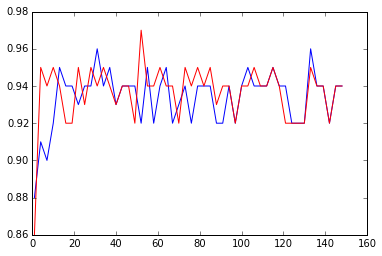

In [54]:
fig=plt.figure()
plt.plot(parameters['n_estimators'],[c.mean_validation_score for c in rf2.grid_scores_],color='b')
rf2.fit(TrainFeature,TrainLabel)
plt.plot(parameters['n_estimators'],[c.mean_validation_score for c in rf2.grid_scores_],color='r')
plt.show()

In [55]:
rf2.best_params_

{'max_features': 'auto', 'n_estimators': 52, 'n_jobs': -1}

RF3 Train:0.97
RF3 Test:0.92


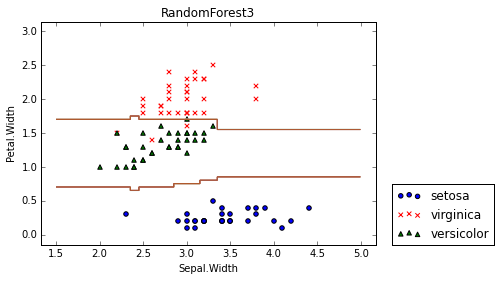

RF4 Train:0.97
RF4 Test:0.92


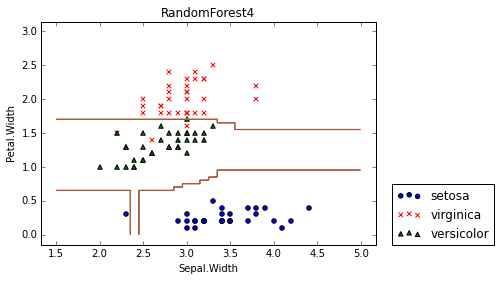

In [56]:
##  ランダムフォレスト　木の数を200にして、改めて実行
rf3 = RandomForestClassifier(   n_estimators=200
                               ,criterion='gini'    #tr2.best_params_['criterion']
                               ,max_depth=8        #tr2.best_params_['max_depth']
                               ,min_samples_leaf=2  #tr2.best_params_['min_samples_leaf']
                               ,min_samples_split=4 #tr2.best_params_['min_samples_split']n_estimators=150
                            )
rf3.fit(TrainFeature,TrainLabel)
result_rf3=rf2.predict(TestFeature)
result_rf3_re=rf2.predict(TrainFeature) 

##　精度検証とプロット
print'RF3 Train:'+ str(accuracy_score(result_rf3_re,TrainLabel))
print'RF3 Test:'+ str(accuracy_score(result_rf3,TestLabel))
bound_visualize(rf3,d1_train,'RandomForest3')

##  ランダムフォレスト　木の数を150にして、改めて実行
rf4 = RandomForestClassifier(   n_estimators=200                                        
                               ,criterion='gini'    #tr2.best_params_['criterion']
                               ,max_depth=8        #tr2.best_params_['max_depth']
                               ,min_samples_leaf=2  #tr2.best_params_['min_samples_leaf']
                               ,min_samples_split=4 #tr2.best_params_['min_samples_split']n_estimators=150
                            )
rf4.fit(TrainFeature,TrainLabel)
result_rf4=rf2.predict(TestFeature)
result_rf4_re=rf2.predict(TrainFeature) 

##　精度検証とプロット
print'RF4 Train:'+ str(accuracy_score(result_rf4_re,TrainLabel))
print'RF4 Test:'+ str(accuracy_score(result_rf4,TestLabel))
bound_visualize(rf4,d1_train,'RandomForest4')

In [57]:
## 変数の重要度
rf3.feature_importances_

array([ 0.26322362,  0.73677638])

SVM1 Train:0.97
SVM1 Test:0.94


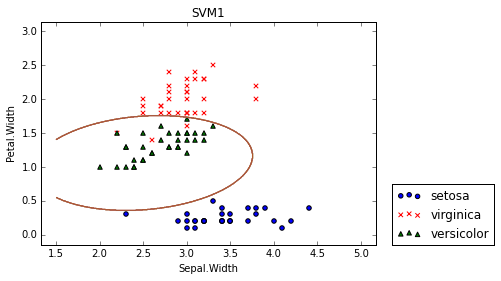

In [58]:
## SVM 
from sklearn.svm import SVC
parameters = {
    'C': [1, 10, 100, 1000], 
   'gamma': [0.1, 0.01,0.001, 0.0001], 
   'kernel': ['linear','rbf','poly','sigmoid'] ,
   }

svm1 = GridSearchCV(SVC(), parameters, cv=20, n_jobs = -1)
svm1.fit(TrainFeature,TrainLabel)
result_svm1=svm1.predict(TestFeature)
result_svm1_re=svm1.predict(TrainFeature) 

##　精度検証とプロット
print'SVM1 Train:'+ str(accuracy_score(result_svm1_re,TrainLabel))
print'SVM1 Test:'+ str(accuracy_score(result_svm1,TestLabel))
bound_visualize(svm1,d1_train,'SVM1')

In [59]:
svm1.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.01, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [60]:
svm1.grid_scores_

[mean: 0.75000, std: 0.17524, params: {'kernel': 'linear', 'C': 1, 'gamma': 0.1},
 mean: 0.76000, std: 0.16555, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.1},
 mean: 0.79000, std: 0.15042, params: {'kernel': 'poly', 'C': 1, 'gamma': 0.1},
 mean: 0.66000, std: 0.06212, params: {'kernel': 'sigmoid', 'C': 1, 'gamma': 0.1},
 mean: 0.75000, std: 0.17524, params: {'kernel': 'linear', 'C': 1, 'gamma': 0.01},
 mean: 0.66000, std: 0.06212, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.01},
 mean: 0.66000, std: 0.06212, params: {'kernel': 'poly', 'C': 1, 'gamma': 0.01},
 mean: 0.66000, std: 0.06212, params: {'kernel': 'sigmoid', 'C': 1, 'gamma': 0.01},
 mean: 0.75000, std: 0.17524, params: {'kernel': 'linear', 'C': 1, 'gamma': 0.001},
 mean: 0.66000, std: 0.06212, params: {'kernel': 'rbf', 'C': 1, 'gamma': 0.001},
 mean: 0.66000, std: 0.06212, params: {'kernel': 'poly', 'C': 1, 'gamma': 0.001},
 mean: 0.66000, std: 0.06212, params: {'kernel': 'sigmoid', 'C': 1, 'gamma': 0.001},
 mean: 0.75000, 